
Created on Tue May 10 16:37:41 2022

@author: David Da Costa & Theodore Psillos

EEE4120F Machine Learning Project
Image Classification 

**Classifying Lion, Leopard or Elephant**


In [61]:
#Import Packages

import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
#import math
import os
import pickle
from sklearn.model_selection import train_test_split
import cv2
import random
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import keras
from tensorflow.keras import models , layers
from keras.regularizers import l2
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers


In [62]:
#animals = ["Lion", "Rhinos","Elephant","Buffelo", "Leopard"] #Categories to classify
animals = ["Lion","Elephant", "Leopard"]
DIR = ("Data/") #Datapath Directory

In [63]:
new_size =60 #Setting the image shape
training_data = []
for animal in animals:
    path = os.path.join(DIR,animal)
    animal_num = animals.index(animal)
    for image in os.listdir(path):
        try: 
            img_arr = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_arr, (new_size,new_size))#Make images new size
            training_data.append([new_array,animal_num])
        except Exception as e:
            pass

In [64]:
display(training_data[0])
print("Shape of training data: ",np.shape(training_data))

[array([[134, 136, 137, ...,  62,  86, 101],
        [129, 130, 131, ...,  56,  79,  92],
        [116, 117, 117, ...,  54,  70,  74],
        ...,
        [ 28,  46,  11, ...,  51,  50,  41],
        [ 17,  21,  32, ...,  52,  44,  42],
        [ 22,  34,  40, ...,  46,  46,  51]], dtype=uint8),
 0]

Shape of training data:  (2434, 2)


C:\Users\david\anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [65]:
random.shuffle(training_data) #shuffle data

In [66]:
X = []
y = []


In [67]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, new_size, new_size, 1)
y = np.array(y).reshape(-1,1)


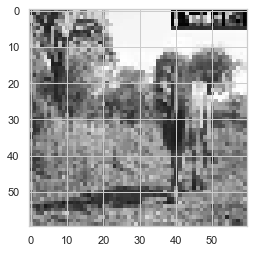

In [68]:
plt.imshow(X[0], cmap = "gray")
plt.show()

In [69]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close

<function BufferedWriter.close>

In [70]:
#pickle_in = open("X.pickle", "rb")
#X = pickle.load(pickle_in)

In [71]:
num_lion=0
num_rhino=0
num_elephant=0
num_buffelo=0
num_leopard=0
#animals = ["Lion", "Rhinos","Elephant","Buffelo", "Leopard"] #Categories to classify
for img,animal in training_data:
    if animal ==0:
        num_lion+=1
        
    if animal ==1:
        num_elephant+=1
    if animal ==2:
        num_leopard +=1

        
    

In [72]:
#data = pd.DataFrame({'Player':["Salah","Mane","Diaz","Bobby"],'Count_pics':[num_salah, num_mane, num_diaz, num_bobby]})
data = pd.DataFrame({'Animal':["Lion","Elephant","Leopard"],'Count Pics':[num_lion,num_elephant , num_leopard]})

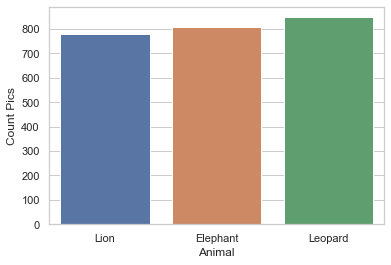

In [75]:
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="Animal", y="Count Pics", data=data)
fig = ax.get_figure()
 
fig.savefig('num_images.png')

In [34]:
data.describe()

,Count Pics
count,3.000000
mean,811.333333
std,35.118846
min,778.000000
25%,793.000000
50%,808.000000
75%,828.000000
max,848.000000


Scaling Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.1, random_state=42)

In [36]:
X_test = X_test/255 #normalizing pixel value
X_train = X_train/255 #normalizing pixel value
X_test = np.array(X_test).reshape(-1, new_size, new_size, 1)
y_test = np.array(y_test).reshape(-1,1)
X_train = np.array(X_train).reshape(-1, new_size, new_size, 1)
y_train = np.array(y_train).reshape(-1,1)

In [37]:
X_train.shape
X_test.shape

(244, 60, 60, 1)

In [38]:
new_sie = 60

In [39]:
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
num_folds = 8
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
acc_per_fold1 = []
loss_per_fold1 = []
for train, test in kfold.split(inputs, targets):
    model = Sequential()

        
    model.add(Conv2D(128, kernel_size = (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Conv2D(64, kernel_size = (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(inputs[train],targets[train],epochs = 20,batch_size = 60, validation_split = 0.01)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold1.append(scores[1] * 100)
    loss_per_fold1.append(scores[0])
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
36/36 [==============================] - 17s 421ms/step - loss: 1.0827 - accuracy: 0.4238 - val_loss: 0.9239 - val_accuracy: 0.5909
Epoch 2/20
36/36 [==============================] - 16s 431ms/step - loss: 0.8606 - accuracy: 0.6274 - val_loss: 0.8559 - val_accuracy: 0.5909
Epoch 3/20
36/36 [==============================] - 13s 351ms/step - loss: 0.7565 - accuracy: 0.6801 - val_loss: 0.7298 - val_accuracy: 0.7727
Epoch 4/20
36/36 [==============================] - 18s 498ms/step - loss: 0.7288 - accuracy: 0.7000 - val_loss: 0.8283 - val_accuracy: 0.6818
Epoch 5/20
36/36 [==============================] - 19s 541ms/step - loss: 0.7161 - accuracy: 0.7062 - val_loss: 0.7573 - val_accuracy: 0.7273
Epoch 6/20
36/36 [==============================] - 16s 436ms/step - loss: 0.6292 - accuracy: 0.7461 - val_loss: 0.7714 - val_accuracy: 0.7273
Epoch 7/20
36/36 [===========================

Epoch 15/20
36/36 [==============================] - 12s 330ms/step - loss: 0.3227 - accuracy: 0.8828 - val_loss: 1.1112 - val_accuracy: 0.6364
Epoch 16/20
36/36 [==============================] - 12s 324ms/step - loss: 0.3401 - accuracy: 0.8691 - val_loss: 1.0649 - val_accuracy: 0.7273
Epoch 17/20
36/36 [==============================] - 12s 332ms/step - loss: 0.2896 - accuracy: 0.8956 - val_loss: 1.0659 - val_accuracy: 0.7727
Epoch 18/20
36/36 [==============================] - 12s 330ms/step - loss: 0.2501 - accuracy: 0.9189 - val_loss: 1.1483 - val_accuracy: 0.7727
Epoch 19/20
36/36 [==============================] - 12s 327ms/step - loss: 0.2273 - accuracy: 0.9194 - val_loss: 1.4514 - val_accuracy: 0.7273
Epoch 20/20
36/36 [==============================] - 10s 277ms/step - loss: 0.2406 - accuracy: 0.9156 - val_loss: 1.2175 - val_accuracy: 0.7273
Score for fold 3: loss of 0.9371119141578674; accuracy of 75.65789222717285%
-----------------------------------------------------------

In [40]:
num_folds = 8
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)
fold_no = 1
acc_per_fold2 = []
loss_per_fold2 = []
for train, test in kfold.split(inputs, targets):
    model = Sequential()

          
          
    model.add(Conv2D(64, kernel_size = (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.BatchNormalization())
  
   

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(inputs[train],targets[train],epochs = 20,batch_size = 60, validation_split = 0.01)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold2.append(scores[1] * 100)
    loss_per_fold2.append(scores[0])
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
36/36 [==============================] - 8s 178ms/step - loss: 7.2497 - accuracy: 0.5686 - val_loss: 0.9934 - val_accuracy: 0.4091
Epoch 2/20
36/36 [==============================] - 7s 178ms/step - loss: 0.5990 - accuracy: 0.8049 - val_loss: 1.4402 - val_accuracy: 0.2727
Epoch 3/20
36/36 [==============================] - 6s 178ms/step - loss: 0.2482 - accuracy: 0.9165 - val_loss: 0.9398 - val_accuracy: 0.5000
Epoch 4/20
36/36 [==============================] - 9s 238ms/step - loss: 0.1406 - accuracy: 0.9516 - val_loss: 0.8614 - val_accuracy: 0.6364
Epoch 5/20
36/36 [==============================] - 6s 163ms/step - loss: 0.0883 - accuracy: 0.9758 - val_loss: 0.8753 - val_accuracy: 0.5000
Epoch 6/20
36/36 [==============================] - 5s 142ms/step - loss: 0.0640 - accuracy: 0.9834 - val_loss: 0.8639 - val_accuracy: 0.6364
Epoch 7/20
36/36 [==============================] -

Epoch 9/20
36/36 [==============================] - 3s 87ms/step - loss: 0.0446 - accuracy: 0.9934 - val_loss: 0.8918 - val_accuracy: 0.4545
Epoch 10/20
36/36 [==============================] - 3s 90ms/step - loss: 0.0435 - accuracy: 0.9919 - val_loss: 0.7914 - val_accuracy: 0.6364
Epoch 11/20
36/36 [==============================] - 4s 104ms/step - loss: 0.0515 - accuracy: 0.9910 - val_loss: 0.7493 - val_accuracy: 0.7273
Epoch 12/20
36/36 [==============================] - 4s 107ms/step - loss: 0.1081 - accuracy: 0.9772 - val_loss: 0.8484 - val_accuracy: 0.6364
Epoch 13/20
36/36 [==============================] - 5s 129ms/step - loss: 0.0838 - accuracy: 0.9910 - val_loss: 0.9893 - val_accuracy: 0.5909
Epoch 14/20
36/36 [==============================] - 4s 102ms/step - loss: 0.0631 - accuracy: 0.9929 - val_loss: 0.9877 - val_accuracy: 0.5909
Epoch 15/20
36/36 [==============================] - 5s 151ms/step - loss: 0.0534 - accuracy: 0.9929 - val_loss: 1.0325 - val_accuracy: 0.7273
Ep

In [54]:
fold_no = 1
acc_per_fold3 = []
loss_per_fold3 = []
for train, test in kfold.split(inputs, targets):
    model = Sequential()

          
    model.add(Conv2D(128, kernel_size = (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Dropout(0.01))

    

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(inputs[train],targets[train],epochs = 20,batch_size = 60, validation_split = 0.01)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold3.append(scores[1] * 100)
    loss_per_fold3.append(scores[0])
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
36/36 [==============================] - 3s 68ms/step - loss: 2.1107 - accuracy: 0.4689 - val_loss: 1.0604 - val_accuracy: 0.3182
Epoch 2/20
36/36 [==============================] - 2s 60ms/step - loss: 1.6077 - accuracy: 0.5254 - val_loss: 1.0502 - val_accuracy: 0.3182
Epoch 3/20
36/36 [==============================] - 2s 59ms/step - loss: 1.3346 - accuracy: 0.5543 - val_loss: 1.0865 - val_accuracy: 0.2273
Epoch 4/20
36/36 [==============================] - 2s 48ms/step - loss: 1.1728 - accuracy: 0.5804 - val_loss: 1.0823 - val_accuracy: 0.3182
Epoch 5/20
36/36 [==============================] - 2s 54ms/step - loss: 1.0751 - accuracy: 0.6061 - val_loss: 1.0635 - val_accuracy: 0.3182
Epoch 6/20
36/36 [==============================] - 2s 59ms/step - loss: 1.0247 - accuracy: 0.5890 - val_loss: 1.0392 - val_accuracy: 0.3636
Epoch 7/20
36/36 [==============================] - 2s 59

Epoch 16/20
36/36 [==============================] - 1s 19ms/step - loss: 0.7603 - accuracy: 0.6912 - val_loss: 0.8496 - val_accuracy: 0.4545
Epoch 17/20
36/36 [==============================] - 1s 18ms/step - loss: 0.7224 - accuracy: 0.7111 - val_loss: 0.8141 - val_accuracy: 0.5455
Epoch 18/20
36/36 [==============================] - 1s 17ms/step - loss: 0.7182 - accuracy: 0.6912 - val_loss: 0.7660 - val_accuracy: 0.6818
Epoch 19/20
36/36 [==============================] - 1s 17ms/step - loss: 0.6902 - accuracy: 0.6992 - val_loss: 0.6687 - val_accuracy: 0.6818
Epoch 20/20
36/36 [==============================] - 1s 17ms/step - loss: 0.6970 - accuracy: 0.7116 - val_loss: 0.7073 - val_accuracy: 0.5909
Score for fold 3: loss of 0.7711139917373657; accuracy of 63.15789222717285%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
36/36 [==============================] - 3s 60ms/step - loss: 1.7452 - accuracy: 0.4564 - val_loss: 1.129

In [56]:
fold_no = 1
acc_per_fold4 = []
loss_per_fold4 = []
for train, test in kfold.split(inputs, targets):
    model = Sequential()

        
          

    model.add(Conv2D(64, kernel_size = (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.01))

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])


    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(inputs[train],targets[train],epochs = 20,batch_size = 60, validation_split = 0.01)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold4.append(scores[1] * 100)
    loss_per_fold4.append(scores[0])
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
36/36 [==============================] - 3s 88ms/step - loss: 1.2707 - accuracy: 0.4789 - val_loss: 0.9908 - val_accuracy: 0.4545
Epoch 2/20
36/36 [==============================] - 3s 75ms/step - loss: 0.8131 - accuracy: 0.6678 - val_loss: 0.9058 - val_accuracy: 0.5909
Epoch 3/20
36/36 [==============================] - 2s 46ms/step - loss: 0.6963 - accuracy: 0.7262 - val_loss: 0.6198 - val_accuracy: 0.8636
Epoch 4/20
36/36 [==============================] - 2s 53ms/step - loss: 0.5854 - accuracy: 0.7945 - val_loss: 0.8290 - val_accuracy: 0.5455
Epoch 5/20
36/36 [==============================] - 2s 48ms/step - loss: 0.5105 - accuracy: 0.8215 - val_loss: 0.5867 - val_accuracy: 0.9091
Epoch 6/20
36/36 [==============================] - 2s 46ms/step - loss: 0.4339 - accuracy: 0.8576 - val_loss: 0.6283 - val_accuracy: 0.8182
Epoch 7/20
36/36 [==============================] - 2s 58

Epoch 16/20
36/36 [==============================] - 2s 42ms/step - loss: 0.1143 - accuracy: 0.9720 - val_loss: 0.6819 - val_accuracy: 0.9091
Epoch 17/20
36/36 [==============================] - 2s 46ms/step - loss: 0.1219 - accuracy: 0.9768 - val_loss: 0.8308 - val_accuracy: 0.5909
Epoch 18/20
36/36 [==============================] - 2s 44ms/step - loss: 0.0975 - accuracy: 0.9787 - val_loss: 0.6859 - val_accuracy: 0.9091
Epoch 19/20
36/36 [==============================] - 2s 42ms/step - loss: 0.0913 - accuracy: 0.9824 - val_loss: 0.9271 - val_accuracy: 0.5909
Epoch 20/20
36/36 [==============================] - 2s 43ms/step - loss: 0.0845 - accuracy: 0.9839 - val_loss: 0.7448 - val_accuracy: 0.7727
Score for fold 3: loss of 0.7663928270339966; accuracy of 76.97368264198303%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/20
36/36 [==============================] - 4s 80ms/step - loss: 1.5178 - accuracy: 0.4246 - val_loss: 0.993

36/36 [==============================] - 2s 44ms/step - loss: 0.2543 - accuracy: 0.9369 - val_loss: 0.8550 - val_accuracy: 0.6818
Epoch 11/20
36/36 [==============================] - 1s 40ms/step - loss: 0.2438 - accuracy: 0.9312 - val_loss: 0.9189 - val_accuracy: 0.6364
Epoch 12/20
36/36 [==============================] - 1s 39ms/step - loss: 0.2282 - accuracy: 0.9288 - val_loss: 1.0941 - val_accuracy: 0.6818
Epoch 13/20
36/36 [==============================] - 2s 44ms/step - loss: 0.1954 - accuracy: 0.9511 - val_loss: 0.6759 - val_accuracy: 0.7727
Epoch 14/20
36/36 [==============================] - 2s 50ms/step - loss: 0.1736 - accuracy: 0.9502 - val_loss: 0.7658 - val_accuracy: 0.7727
Epoch 15/20
36/36 [==============================] - 2s 48ms/step - loss: 0.1584 - accuracy: 0.9611 - val_loss: 1.0081 - val_accuracy: 0.6364ss: 0.1522 - ac
Epoch 16/20
36/36 [==============================] - 3s 75ms/step - loss: 0.1285 - accuracy: 0.9734 - val_loss: 0.7183 - val_accuracy: 0.7727
Epo

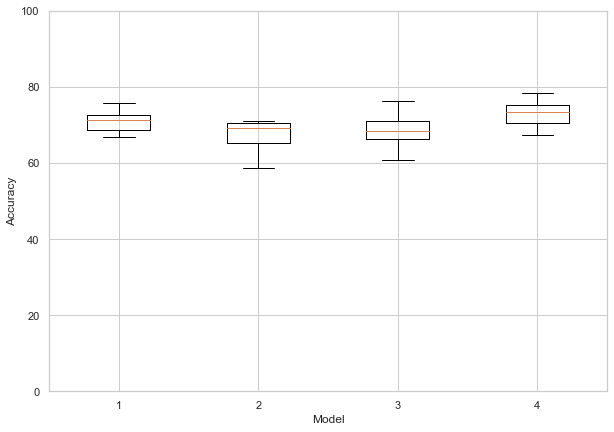

In [57]:
data = [acc_per_fold1,acc_per_fold2,acc_per_fold3,acc_per_fold4]
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)
plt.savefig('4_models.png')
plt.show()


In [236]:
model = Sequential()

        
model.add(Conv2D(128, kernel_size = (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
    

model.add(Conv2D(64, kernel_size = (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
    

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train,y_train,epochs = 25,batch_size = 60, validation_split = 0.01)

    

Epoch 1/25
37/37 [==============================] - 6s 162ms/step - loss: 1.0583 - accuracy: 0.4400 - val_loss: 0.8906 - val_accuracy: 0.5455
Epoch 2/25
37/37 [==============================] - 6s 157ms/step - loss: 0.8328 - accuracy: 0.6292 - val_loss: 0.9987 - val_accuracy: 0.4545
Epoch 3/25
37/37 [==============================] - 6s 165ms/step - loss: 0.7524 - accuracy: 0.6887 - val_loss: 0.6623 - val_accuracy: 0.8182
Epoch 4/25
37/37 [==============================] - 6s 159ms/step - loss: 0.6788 - accuracy: 0.7279 - val_loss: 0.6404 - val_accuracy: 0.8636
Epoch 5/25
37/37 [==============================] - 6s 160ms/step - loss: 0.6316 - accuracy: 0.7542 - val_loss: 0.6200 - val_accuracy: 0.9091
Epoch 6/25
37/37 [==============================] - 6s 172ms/step - loss: 0.5859 - accuracy: 0.7708 - val_loss: 0.6871 - val_accuracy: 0.8182
Epoch 7/25
37/37 [==============================] - 6s 172ms/step - loss: 0.5499 - accuracy: 0.7855 - val_loss: 0.9563 - val_accuracy: 0.5000
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


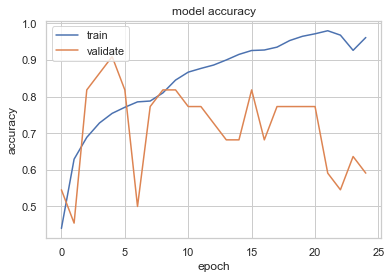

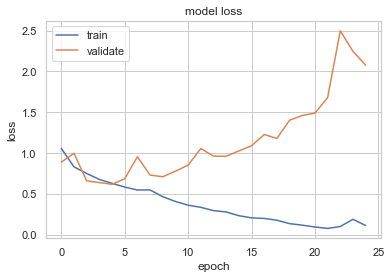

In [237]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.savefig('unregularized_accuracy_vs_epoch.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.savefig('unregularized_loss_vs_epoch.png')
plt.show()

In [257]:
model = Sequential()

        
model.add(Conv2D(128,
                 kernel_size = (3, 3),
                 kernel_regularizer=regularizers.L1(0.001),
                 bias_regularizer=regularizers.L2(0.0001),
                # activity_regularizer=regularizers.L2(1e-5)
                )
         )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
    

model.add(Conv2D(64,
                 kernel_size = (3, 3),
                 kernel_regularizer=regularizers.L1(0.001),
                 bias_regularizer=regularizers.L2(0.0001),
                #activity_regularizer=regularizers.L2(1e-5)
                )
         )
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
    

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(X_train,y_train,epochs = 25,batch_size = 60, validation_split = 0.01)

    

Epoch 1/25
37/37 [==============================] - 6s 166ms/step - loss: 2.5862 - accuracy: 0.3902 - val_loss: 1.9035 - val_accuracy: 0.4545
Epoch 2/25
37/37 [==============================] - 7s 179ms/step - loss: 1.6140 - accuracy: 0.5613 - val_loss: 1.3324 - val_accuracy: 0.6818
Epoch 3/25
37/37 [==============================] - 5s 143ms/step - loss: 1.2458 - accuracy: 0.6674 - val_loss: 1.2683 - val_accuracy: 0.5000
Epoch 4/25
37/37 [==============================] - 6s 172ms/step - loss: 1.0929 - accuracy: 0.6739 - val_loss: 1.0967 - val_accuracy: 0.5455
Epoch 5/25
37/37 [==============================] - 7s 193ms/step - loss: 1.0370 - accuracy: 0.6642 - val_loss: 0.9520 - val_accuracy: 0.6818
Epoch 6/25
37/37 [==============================] - 6s 169ms/step - loss: 0.9141 - accuracy: 0.7117 - val_loss: 0.9668 - val_accuracy: 0.5909
Epoch 7/25
37/37 [==============================] - 6s 161ms/step - loss: 0.8369 - accuracy: 0.7269 - val_loss: 0.7179 - val_accuracy: 0.7727
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


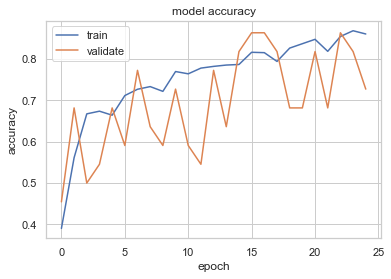

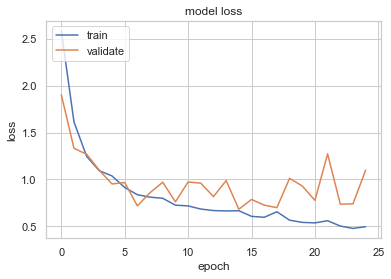

In [258]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.savefig('regularized_accuracy_vs_epoch.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.savefig('regularized_loss_vs_epoch.png')
plt.show()

In [195]:
final_result = []
scores = model.evaluate(X_test,y_test,verbose=0)
final_result.append(scores[1] * 100)

In [196]:
display(final_result)

[75.0]

In [224]:
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
num_folds = 8
kfold = KFold(n_splits=num_folds, shuffle=True)

fold_no = 1
acc_per_fold1 = []
loss_per_fold1 = []
for train, test in kfold.split(inputs, targets):
    model = Sequential()

        
    model.add(Conv2D(128, kernel_size = (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Conv2D(64, kernel_size = (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(inputs[train],targets[train],epochs = 25,batch_size = 60, validation_split = 0.01)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold1.append(scores[1] * 100)
    loss_per_fold1.append(scores[0])
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
36/36 [==============================] - 6s 146ms/step - loss: 1.0746 - accuracy: 0.4400 - val_loss: 0.9025 - val_accuracy: 0.5000
Epoch 2/25
36/36 [==============================] - 6s 166ms/step - loss: 0.8159 - accuracy: 0.6388 - val_loss: 0.8042 - val_accuracy: 0.5455
Epoch 3/25
36/36 [==============================] - 6s 176ms/step - loss: 0.7115 - accuracy: 0.7000 - val_loss: 0.7943 - val_accuracy: 0.5909
Epoch 4/25
36/36 [==============================] - 7s 191ms/step - loss: 0.6791 - accuracy: 0.7133 - val_loss: 0.7931 - val_accuracy: 0.5909
Epoch 5/25
36/36 [==============================] - 6s 175ms/step - loss: 0.6243 - accuracy: 0.7470 - val_loss: 0.6629 - val_accuracy: 0.5909
Epoch 6/25
36/36 [==============================] - 6s 159ms/step - loss: 0.5838 - accuracy: 0.7575 - val_loss: 0.6671 - val_accuracy: 0.7273
Epoch 7/25
36/36 [==============================] -

36/36 [==============================] - 6s 159ms/step - loss: 0.5526 - accuracy: 0.7799 - val_loss: 0.5695 - val_accuracy: 0.7727
Epoch 11/25
36/36 [==============================] - 6s 163ms/step - loss: 0.5149 - accuracy: 0.8036 - val_loss: 0.5651 - val_accuracy: 0.7273
Epoch 12/25
36/36 [==============================] - 6s 169ms/step - loss: 0.4791 - accuracy: 0.8174 - val_loss: 0.5124 - val_accuracy: 0.7727
Epoch 13/25
36/36 [==============================] - 6s 168ms/step - loss: 0.4541 - accuracy: 0.8292 - val_loss: 0.5202 - val_accuracy: 0.8182
Epoch 14/25
36/36 [==============================] - 6s 160ms/step - loss: 0.4453 - accuracy: 0.8311 - val_loss: 0.7413 - val_accuracy: 0.8182
Epoch 15/25
36/36 [==============================] - 6s 162ms/step - loss: 0.4348 - accuracy: 0.8321 - val_loss: 0.5875 - val_accuracy: 0.7727
Epoch 16/25
36/36 [==============================] - 6s 162ms/step - loss: 0.4008 - accuracy: 0.8601 - val_loss: 0.6985 - val_accuracy: 0.8182
Epoch 17/25

36/36 [==============================] - 6s 176ms/step - loss: 0.2248 - accuracy: 0.9260 - val_loss: 0.4681 - val_accuracy: 0.8182
Epoch 16/25
36/36 [==============================] - 6s 164ms/step - loss: 0.1975 - accuracy: 0.9326 - val_loss: 0.4377 - val_accuracy: 0.7727
Epoch 17/25
36/36 [==============================] - 6s 171ms/step - loss: 0.1667 - accuracy: 0.9492 - val_loss: 0.5017 - val_accuracy: 0.7727
Epoch 18/25
36/36 [==============================] - 6s 173ms/step - loss: 0.1238 - accuracy: 0.9654 - val_loss: 0.4797 - val_accuracy: 0.8182
Epoch 19/25
36/36 [==============================] - 6s 173ms/step - loss: 0.1036 - accuracy: 0.9692 - val_loss: 0.6511 - val_accuracy: 0.6818
Epoch 20/25
36/36 [==============================] - 6s 175ms/step - loss: 0.1282 - accuracy: 0.9597 - val_loss: 0.6398 - val_accuracy: 0.8182
Epoch 21/25
36/36 [==============================] - 6s 172ms/step - loss: 0.1217 - accuracy: 0.9658 - val_loss: 0.7268 - val_accuracy: 0.8182
Epoch 22/25

In [221]:

fold_no = 1
acc_per_fold_new = []
loss_per_fold_new = []
for train, test in kfold.split(inputs, targets):
    model = Sequential()

        
    model.add(Conv2D(128,
                     kernel_size = (3, 3),
                     kernel_regularizer=regularizers.L1(0.001),
                     bias_regularizer=regularizers.L2(0.0001),
                    # activity_regularizer=regularizers.L2(1e-5)
                    )
             )
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Conv2D(64,
                     kernel_size = (3, 3),
                     kernel_regularizer=regularizers.L1(0.001),
                     bias_regularizer=regularizers.L2(0.0001),
                    #activity_regularizer=regularizers.L2(1e-5)
                    )
             )
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    

    model.add(Flatten())
    model.add(Dense(64))

    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
    
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    history = model.fit(inputs[train],targets[train],epochs = 25,batch_size = 60, validation_split = 0.01)
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold_new.append(scores[1] * 100)
    loss_per_fold_new.append(scores[0])
    fold_no = fold_no + 1

# show plot
#plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/25
36/36 [==============================] - 5s 128ms/step - loss: 2.4942 - accuracy: 0.4528 - val_loss: 1.6739 - val_accuracy: 0.7273
Epoch 2/25
36/36 [==============================] - 6s 175ms/step - loss: 1.4701 - accuracy: 0.6179 - val_loss: 1.2043 - val_accuracy: 0.7273
Epoch 3/25
36/36 [==============================] - 6s 172ms/step - loss: 1.1660 - accuracy: 0.6820 - val_loss: 1.0130 - val_accuracy: 0.6818
Epoch 4/25
36/36 [==============================] - 7s 198ms/step - loss: 1.0496 - accuracy: 0.6877 - val_loss: 0.9147 - val_accuracy: 0.7273
Epoch 5/25
36/36 [==============================] - 7s 195ms/step - loss: 0.9559 - accuracy: 0.6986 - val_loss: 0.8852 - val_accuracy: 0.6818
Epoch 6/25
36/36 [==============================] - 7s 197ms/step - loss: 0.8955 - accuracy: 0.7105 - val_loss: 0.9447 - val_accuracy: 0.6818
Epoch 7/25
36/36 [==============================] -

Epoch 10/25
36/36 [==============================] - 7s 190ms/step - loss: 0.7427 - accuracy: 0.7628 - val_loss: 0.8484 - val_accuracy: 0.6364
Epoch 11/25
36/36 [==============================] - 7s 188ms/step - loss: 0.7285 - accuracy: 0.7761 - val_loss: 0.8192 - val_accuracy: 0.6364
Epoch 12/25
36/36 [==============================] - 7s 191ms/step - loss: 0.6915 - accuracy: 0.7880 - val_loss: 0.7066 - val_accuracy: 0.7273
Epoch 13/25
36/36 [==============================] - 7s 189ms/step - loss: 0.6683 - accuracy: 0.7998 - val_loss: 0.7539 - val_accuracy: 0.7273
Epoch 14/25
36/36 [==============================] - 7s 188ms/step - loss: 0.6488 - accuracy: 0.8126 - val_loss: 0.7577 - val_accuracy: 0.6364
Epoch 15/25
36/36 [==============================] - 7s 182ms/step - loss: 0.6438 - accuracy: 0.8107 - val_loss: 0.7565 - val_accuracy: 0.6364
Epoch 16/25
36/36 [==============================] - 6s 164ms/step - loss: 0.6435 - accuracy: 0.8079 - val_loss: 0.6804 - val_accuracy: 0.7727

Epoch 15/25
36/36 [==============================] - 6s 172ms/step - loss: 0.6000 - accuracy: 0.8231 - val_loss: 0.8011 - val_accuracy: 0.7273
Epoch 16/25
36/36 [==============================] - 6s 172ms/step - loss: 0.5756 - accuracy: 0.8430 - val_loss: 0.7840 - val_accuracy: 0.8182
Epoch 17/25
36/36 [==============================] - 6s 173ms/step - loss: 0.5827 - accuracy: 0.8321 - val_loss: 0.7153 - val_accuracy: 0.7727
Epoch 18/25
36/36 [==============================] - 6s 178ms/step - loss: 0.5362 - accuracy: 0.8463 - val_loss: 0.7141 - val_accuracy: 0.8182
Epoch 19/25
36/36 [==============================] - 6s 170ms/step - loss: 0.5328 - accuracy: 0.8572 - val_loss: 0.7670 - val_accuracy: 0.6818
Epoch 20/25
36/36 [==============================] - 7s 190ms/step - loss: 0.5134 - accuracy: 0.8648 - val_loss: 0.8662 - val_accuracy: 0.6818
Epoch 21/25
36/36 [==============================] - 7s 187ms/step - loss: 0.5015 - accuracy: 0.8639 - val_loss: 0.6726 - val_accuracy: 0.7273

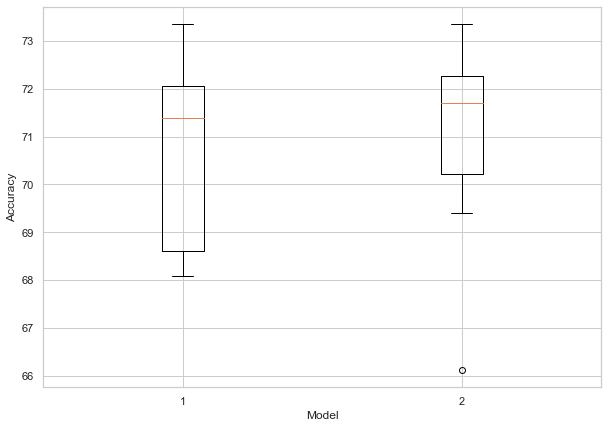

In [232]:

comp = [acc_per_fold1,acc_per_fold_new]
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(comp)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.savefig('comparison_Boxplot.png')
plt.show()


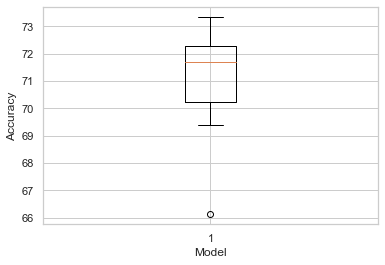

In [230]:
plt.boxplot(acc_per_fold_new)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.savefig('final_model_box.png')
plt.show()


In [201]:
final_model = Sequential()

        
final_model.add(Conv2D(128,
                 kernel_size = (3, 3),
                 kernel_regularizer=regularizers.L1(0.001),
                 bias_regularizer=regularizers.L2(0.0001),
                # activity_regularizer=regularizers.L2(1e-5)
                )
         )
final_model.add(Activation("relu"))
final_model.add(MaxPooling2D(pool_size=(2,2)))
    

final_model.add(Conv2D(64,
                 kernel_size = (3, 3),
                 kernel_regularizer=regularizers.L1(0.001),
                 bias_regularizer=regularizers.L2(0.0001),
                #activity_regularizer=regularizers.L2(1e-5)
                )
         )
final_model.add(Activation("relu"))
final_model.add(MaxPooling2D(pool_size=(2,2)))
    

final_model.add(Flatten())
final_model.add(Dense(64))

final_model.add(Dense(3))
final_model.add(Activation('sigmoid'))

final_model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
history = final_model.fit(X_train,y_train,epochs = 25,batch_size = 60, validation_split = 0.01)
final_result = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/25
37/37 [==============================] - 8s 209ms/step - loss: 2.5395 - accuracy: 0.4700 - val_loss: 1.7973 - val_accuracy: 0.6364
Epoch 2/25
37/37 [==============================] - 8s 210ms/step - loss: 1.4897 - accuracy: 0.5982 - val_loss: 1.3204 - val_accuracy: 0.5909
Epoch 3/25
37/37 [==============================] - 7s 184ms/step - loss: 1.1566 - accuracy: 0.6522 - val_loss: 1.0022 - val_accuracy: 0.6818
Epoch 4/25
37/37 [==============================] - 7s 192ms/step - loss: 0.9767 - accuracy: 0.6933 - val_loss: 1.0321 - val_accuracy: 0.6364
Epoch 5/25
37/37 [==============================] - 7s 183ms/step - loss: 0.9037 - accuracy: 0.6854 - val_loss: 0.8673 - val_accuracy: 0.6364
Epoch 6/25
37/37 [==============================] - 7s 180ms/step - loss: 0.8644 - accuracy: 0.7131 - val_loss: 0.9174 - val_accuracy: 0.6818
Epoch 7/25
37/37 [==============================] - 7s 183ms/step - loss: 0.8167 - accuracy: 0.7283 - val_loss: 0.9335 - val_accuracy: 0.5455
Epoch 

In [202]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 30ms/step - loss: 0.4847 - accuracy: 0.8689


[0.48474380373954773, 0.868852436542511]

In [76]:
Oave = np.average(acc_per_fold1)
Ovar = np.var(acc_per_fold1)
Ostd = np.std(acc_per_fold1)

ave = np.average(acc_per_fold_new)
var = np.var(acc_per_fold_new)
std = np.std(acc_per_fold_new)


print("***************************************************")
print("***************************************************")
print("**                                               **")
print("**   Old Average Accuracy:   ",Oave,"%**")
print("**   Old Accuracy Variance:  ", Ovar," **")
print("**   Old Standard Deviation: ", Ostd,"**")
print("**                                               **")
print("***************************************************")
print("***************************************************")
print("\n")
ave = np.average(acc_per_fold_new)
var = np.var(acc_per_fold_new)
std = np.std(acc_per_fold_new)
print("**************************************************")
print("**************************************************")
print("**                                              **")
print("**   Average Accuracy:   ",ave,"%   **")
print("**   Accuracy Variance:  ", var,"    **")
print("**   Standard Deviation: ", std,"   **")
print("**                                              **")
print("**************************************************")
print("**************************************************")
print("\n")
print("Final Model Summary: \n")
print(final_model.summary())


NameError: name 'acc_per_fold_new' is not defined